In [1]:
#Importing Basics libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1 :Data Loading

In [2]:
data=pd.read_csv(r"C:\Users\Bansi Shah\OneDrive\Desktop\Machine Learning\Advertising.csv",index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
print(data.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

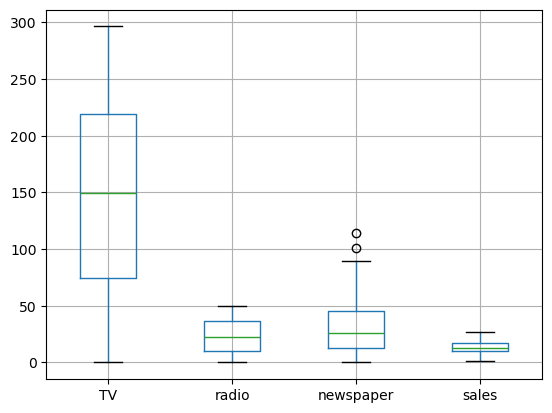

In [7]:
data.boxplot()
plt.show()

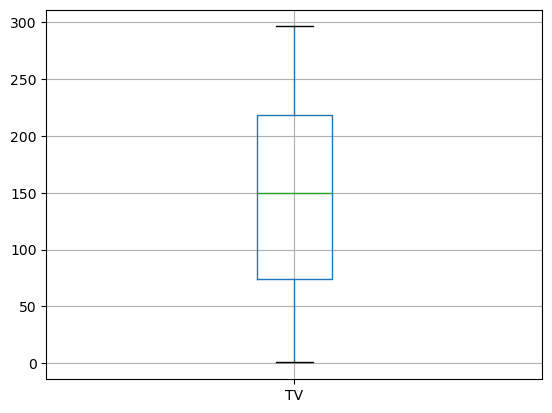

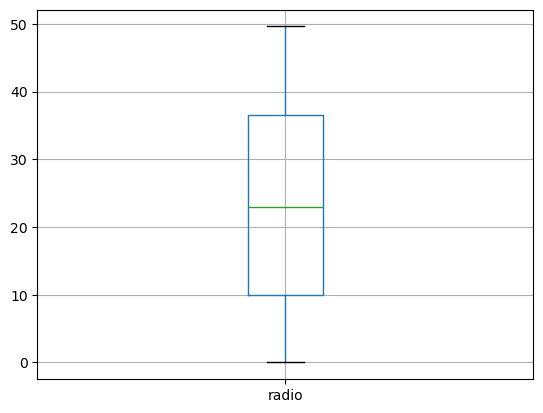

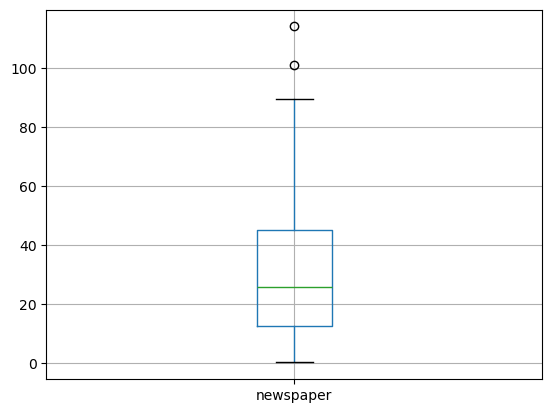

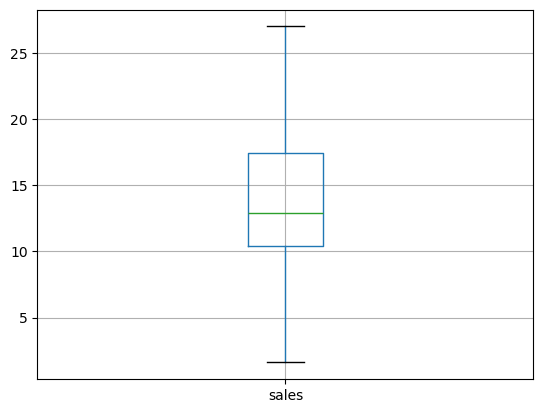

In [8]:
#Assumption 1: There should be no outliers in the data
# check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [9]:
#data.drop(data[data["newspaper"]>90].index,axis=0, inplace=True)

In [10]:
#data[data["newspaper"]>90].index

In [11]:
# data[data["newspaper"]<90]

In [12]:
import warnings
warnings.filterwarnings("ignore")

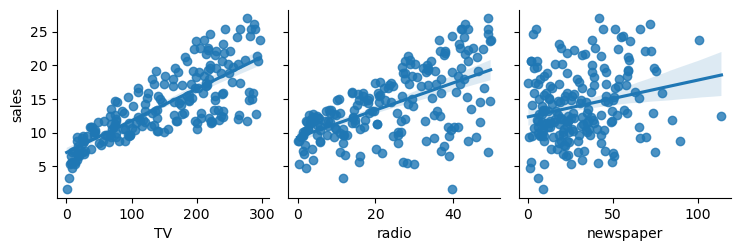

In [13]:
# Assumption 2 : Assumption of linearity every individual variable should have a linear relationship with the dependent variable.
sns.pairplot(data,x_vars = ['TV','radio','newspaper'],
             y_vars=["sales"], kind='reg')
plt.show()


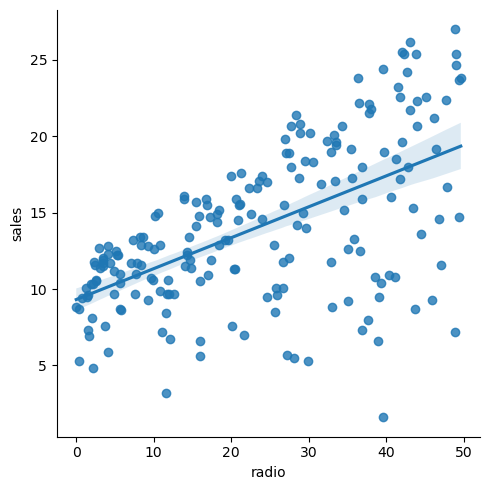

In [14]:
sns.lmplot(data=data,x="radio",y="sales")
plt.show()

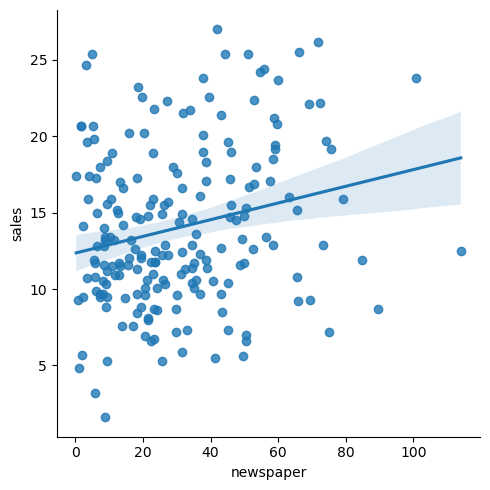

In [15]:
sns.lmplot(data=data,x="newspaper",y="sales")
plt.show()

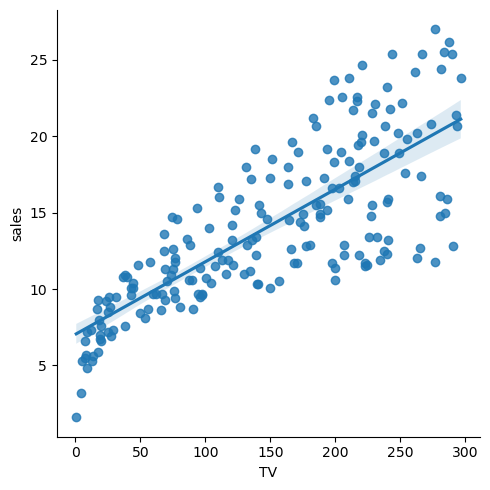

In [16]:
sns.lmplot(data=data,x="TV",y="sales")
plt.show()

In [17]:
#data.drop(["newspaper"],axis=1,inplace=True)

In [18]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
#create X and Y
X= data.loc[:,['TV','radio','newspaper']]
Y= data.loc[:,'sales']
#X=data.iloc[:,0:-1]
#Y= datailoc[:,-1]

In [20]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


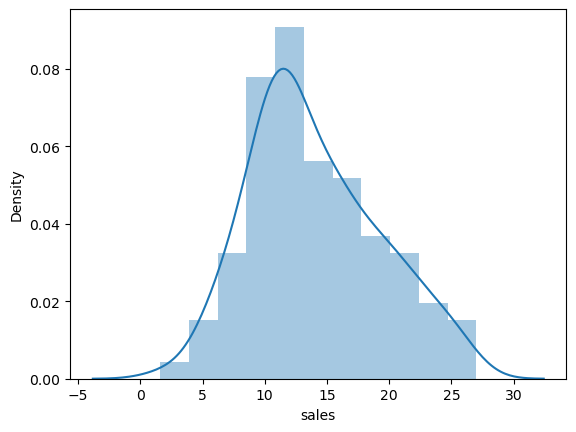

In [21]:
#Assumption 3 :Assumption of Normality The dependent Variable must follow normally distributed
sns.distplot(Y)
plt.show()

In [22]:
from scipy.stats import skew
skew(Y)

np.float64(0.4045082487061191)

In [23]:
# log transformation
import numpy as np
Y_log = np.log(Y)
Y_log

1      3.095578
2      2.341806
3      2.230014
4      2.917771
5      2.557227
         ...   
196    2.028148
197    2.272126
198    2.549445
199    3.238678
200    2.595255
Name: sales, Length: 200, dtype: float64

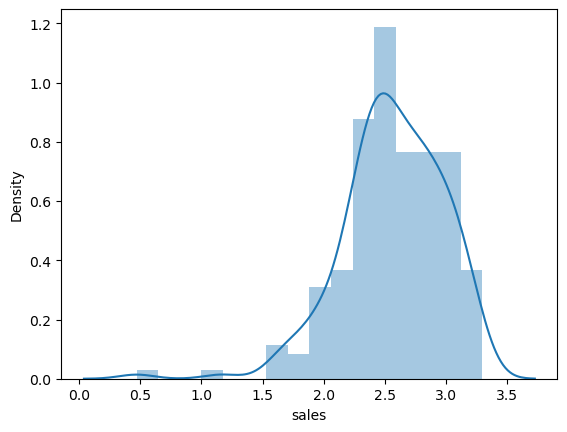

In [24]:
sns.distplot(Y_log)
plt.show()

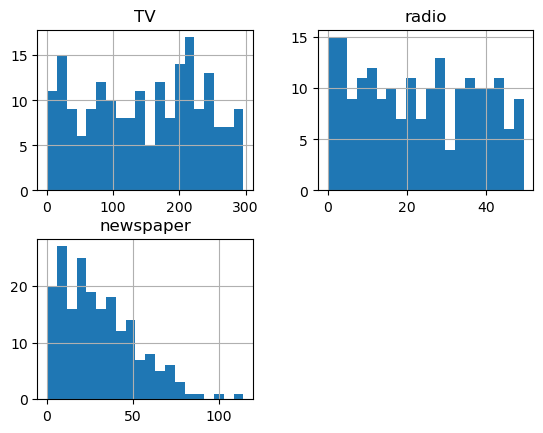

In [25]:
X.hist(bins=20)
plt.show()

In [26]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
 
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


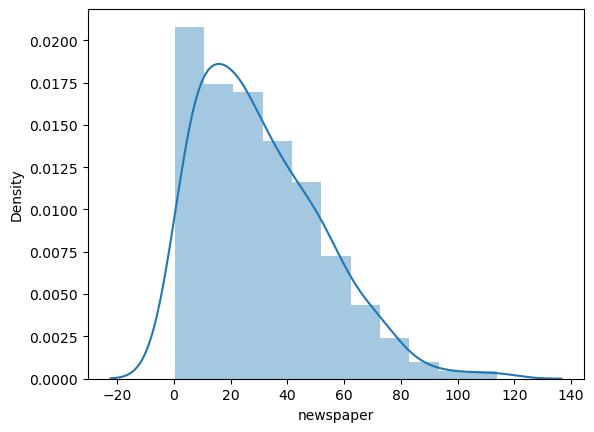

In [27]:
sns.distplot(X.newspaper)
plt.show()

In [28]:
#Assumption 4 : Assumption of Multicollinearity There should be No multicollinearity between independent features